# Chargement des données

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

import seaborn as sns

In [2]:

# Charger l'ensemble de données Pima Indians Diabetes
df = pd.read_csv("horse.csv")
df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surgery                    299 non-null    object 
 1   age                        299 non-null    object 
 2   hospital_number            299 non-null    int64  
 3   rectal_temp                239 non-null    float64
 4   pulse                      275 non-null    float64
 5   respiratory_rate           241 non-null    float64
 6   temp_of_extremities        243 non-null    object 
 7   peripheral_pulse           230 non-null    object 
 8   mucous_membrane            252 non-null    object 
 9   capillary_refill_time      267 non-null    object 
 10  pain                       244 non-null    object 
 11  peristalsis                255 non-null    object 
 12  abdominal_distention       243 non-null    object 
 13  nasogastric_tube           195 non-null    object 

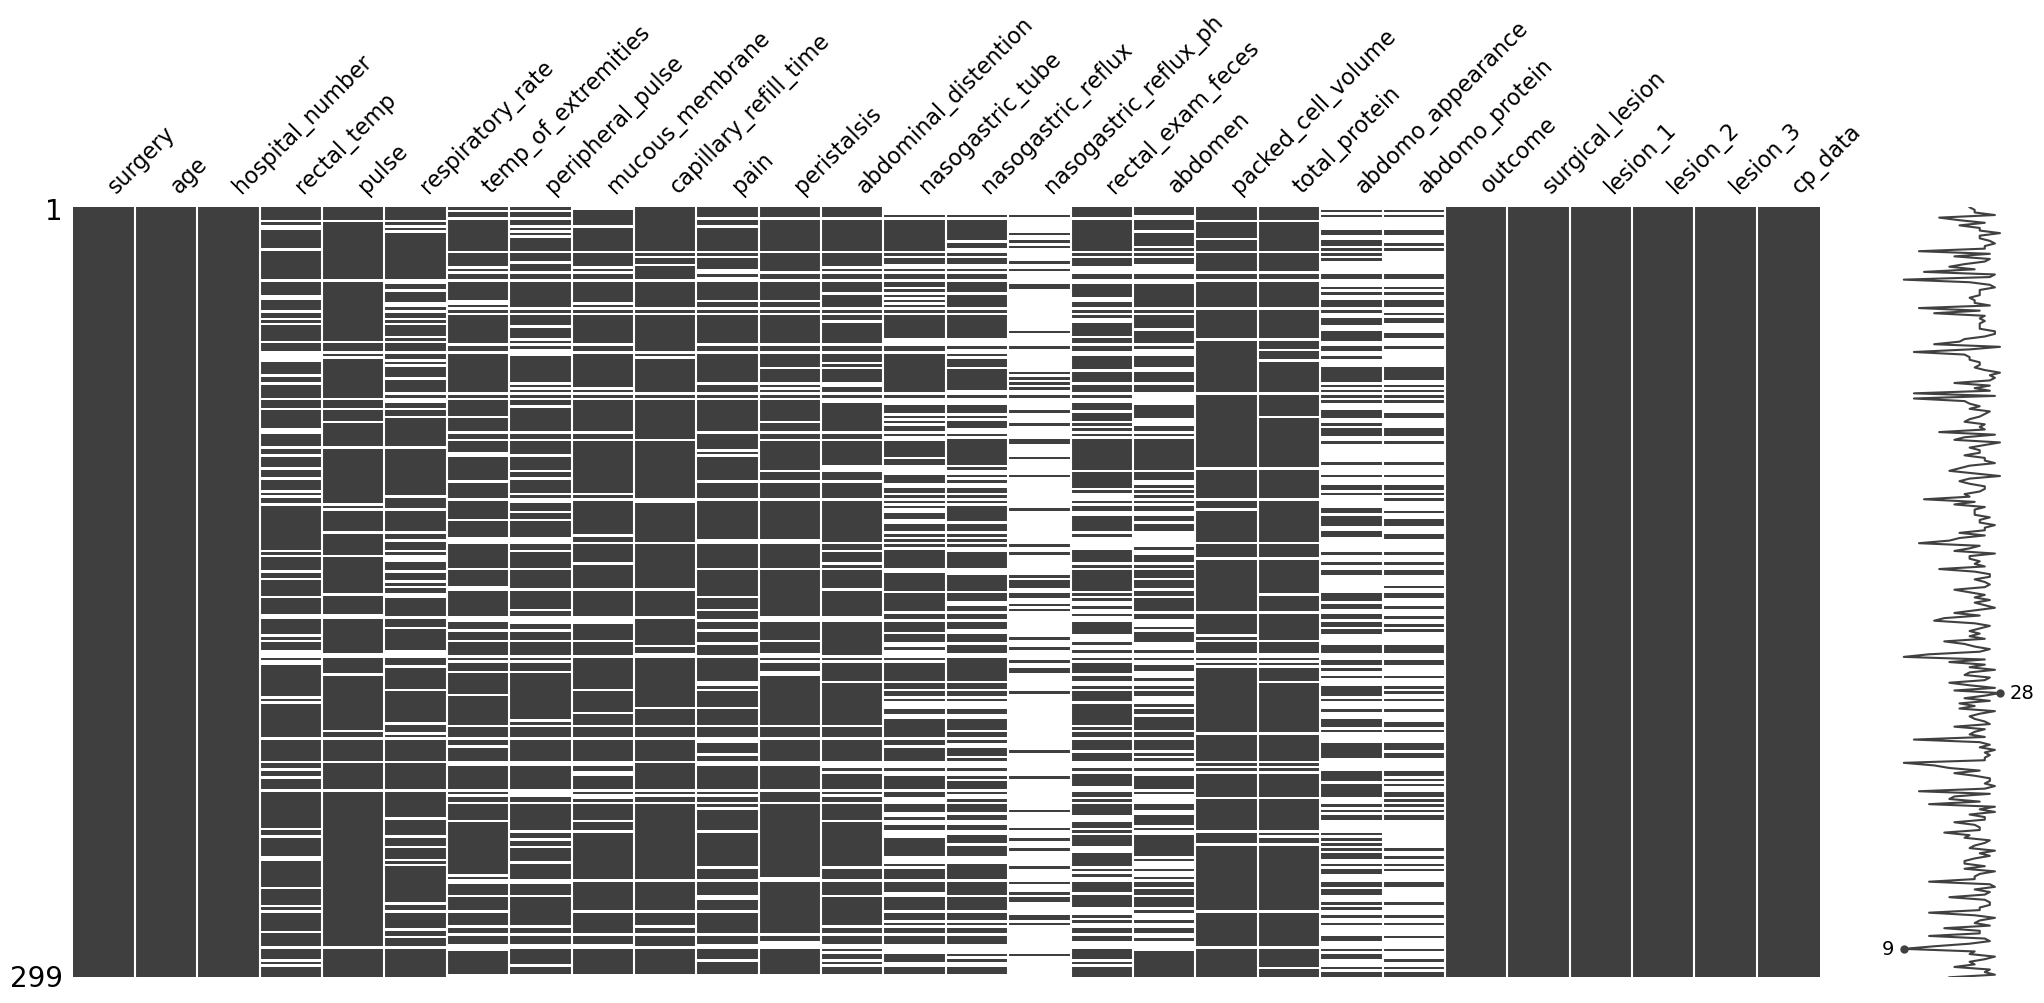

In [4]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(df)
plt.show()

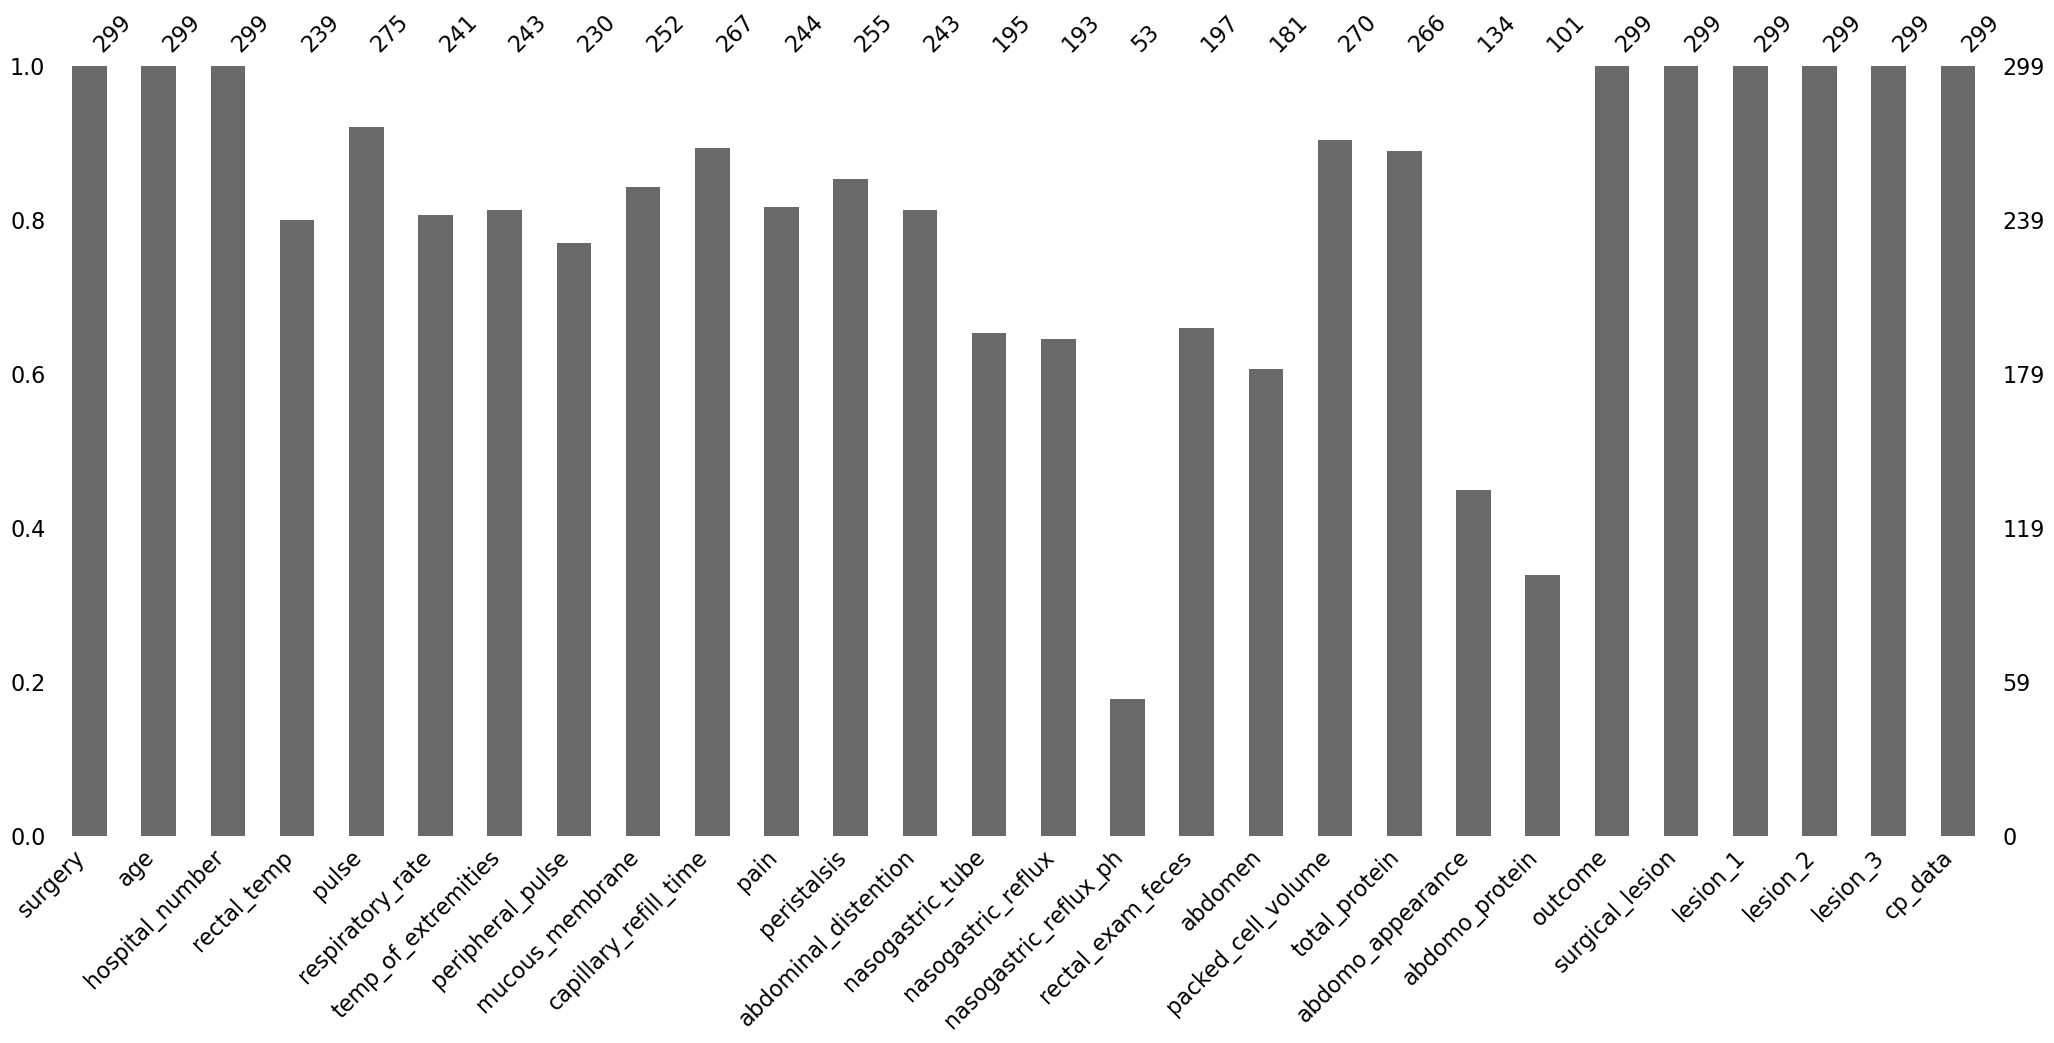

In [5]:
msno.bar(df)
plt.show()

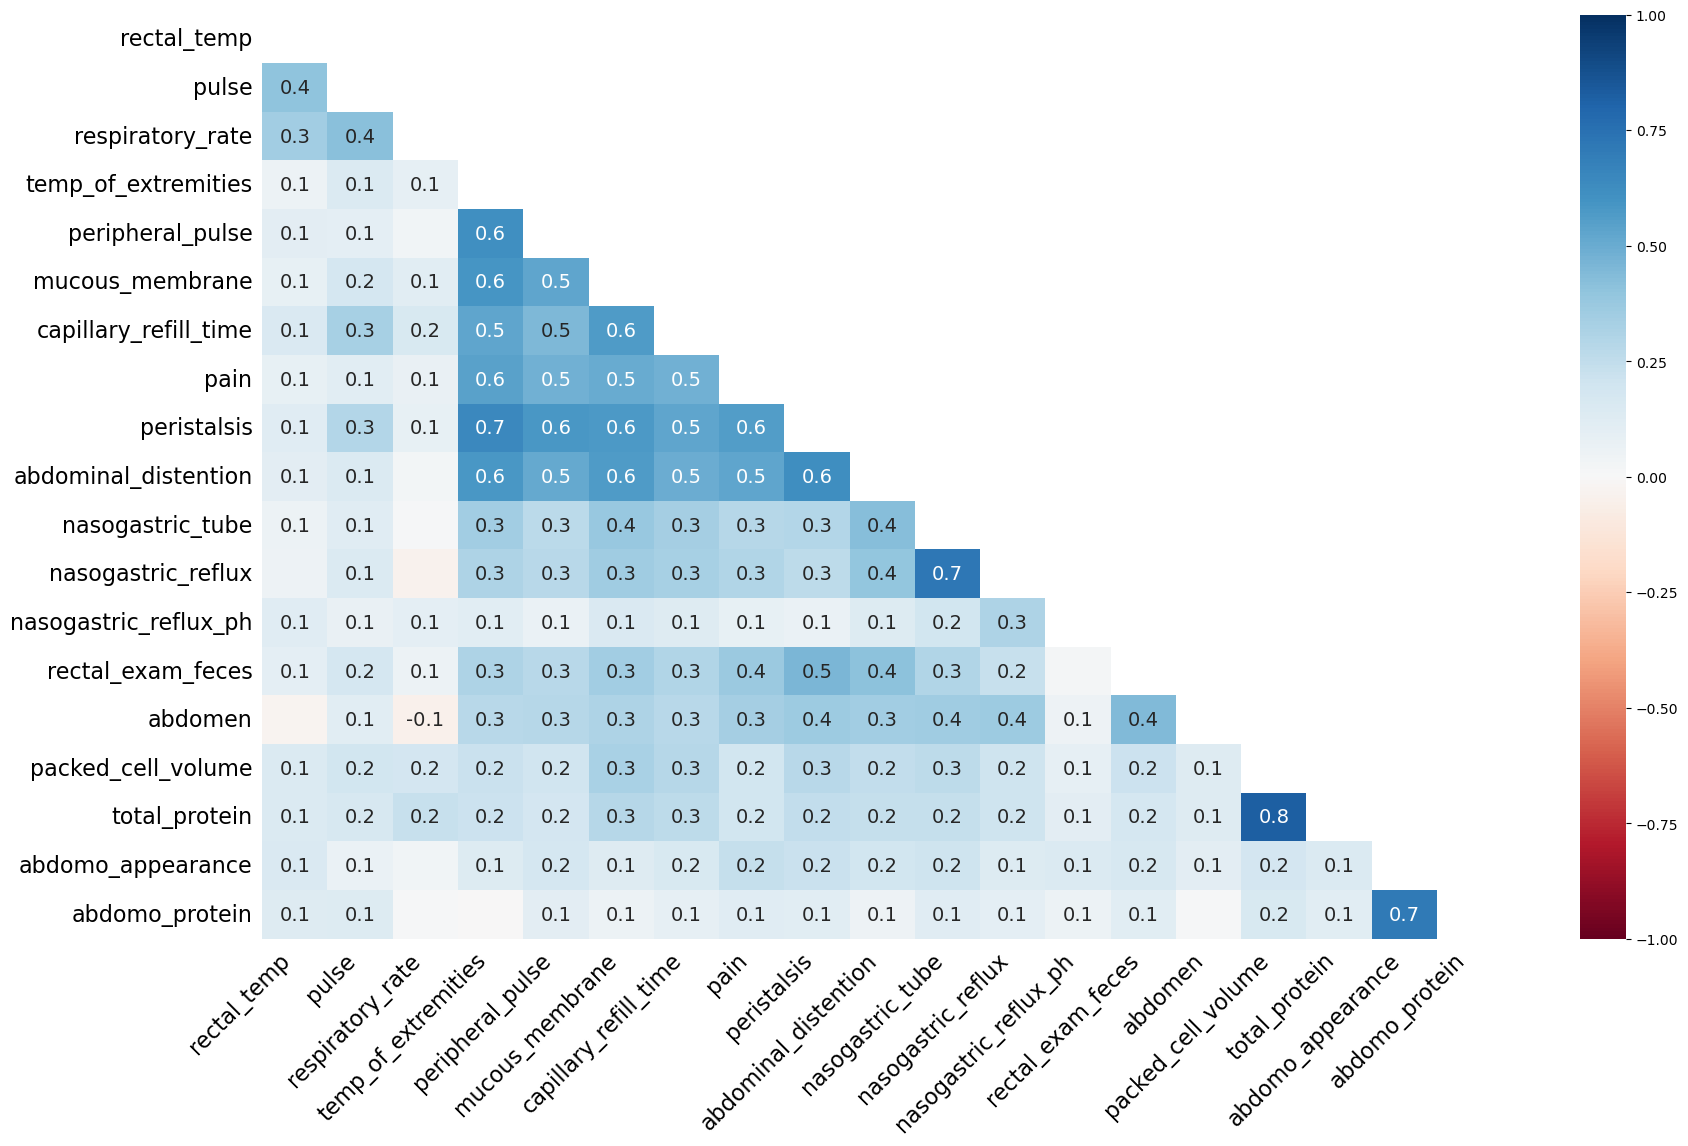

In [6]:
msno.heatmap(df)
plt.show()


In [7]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)


                       Missing Values  Percentage
surgery                             0    0.000000
age                                 0    0.000000
hospital_number                     0    0.000000
rectal_temp                        60   20.066890
pulse                              24    8.026756
respiratory_rate                   58   19.397993
temp_of_extremities                56   18.729097
peripheral_pulse                   69   23.076923
mucous_membrane                    47   15.719064
capillary_refill_time              32   10.702341
pain                               55   18.394649
peristalsis                        44   14.715719
abdominal_distention               56   18.729097
nasogastric_tube                  104   34.782609
nasogastric_reflux                106   35.451505
nasogastric_reflux_ph             246   82.274247
rectal_exam_feces                 102   34.113712
abdomen                           118   39.464883
packed_cell_volume                 29    9.698997


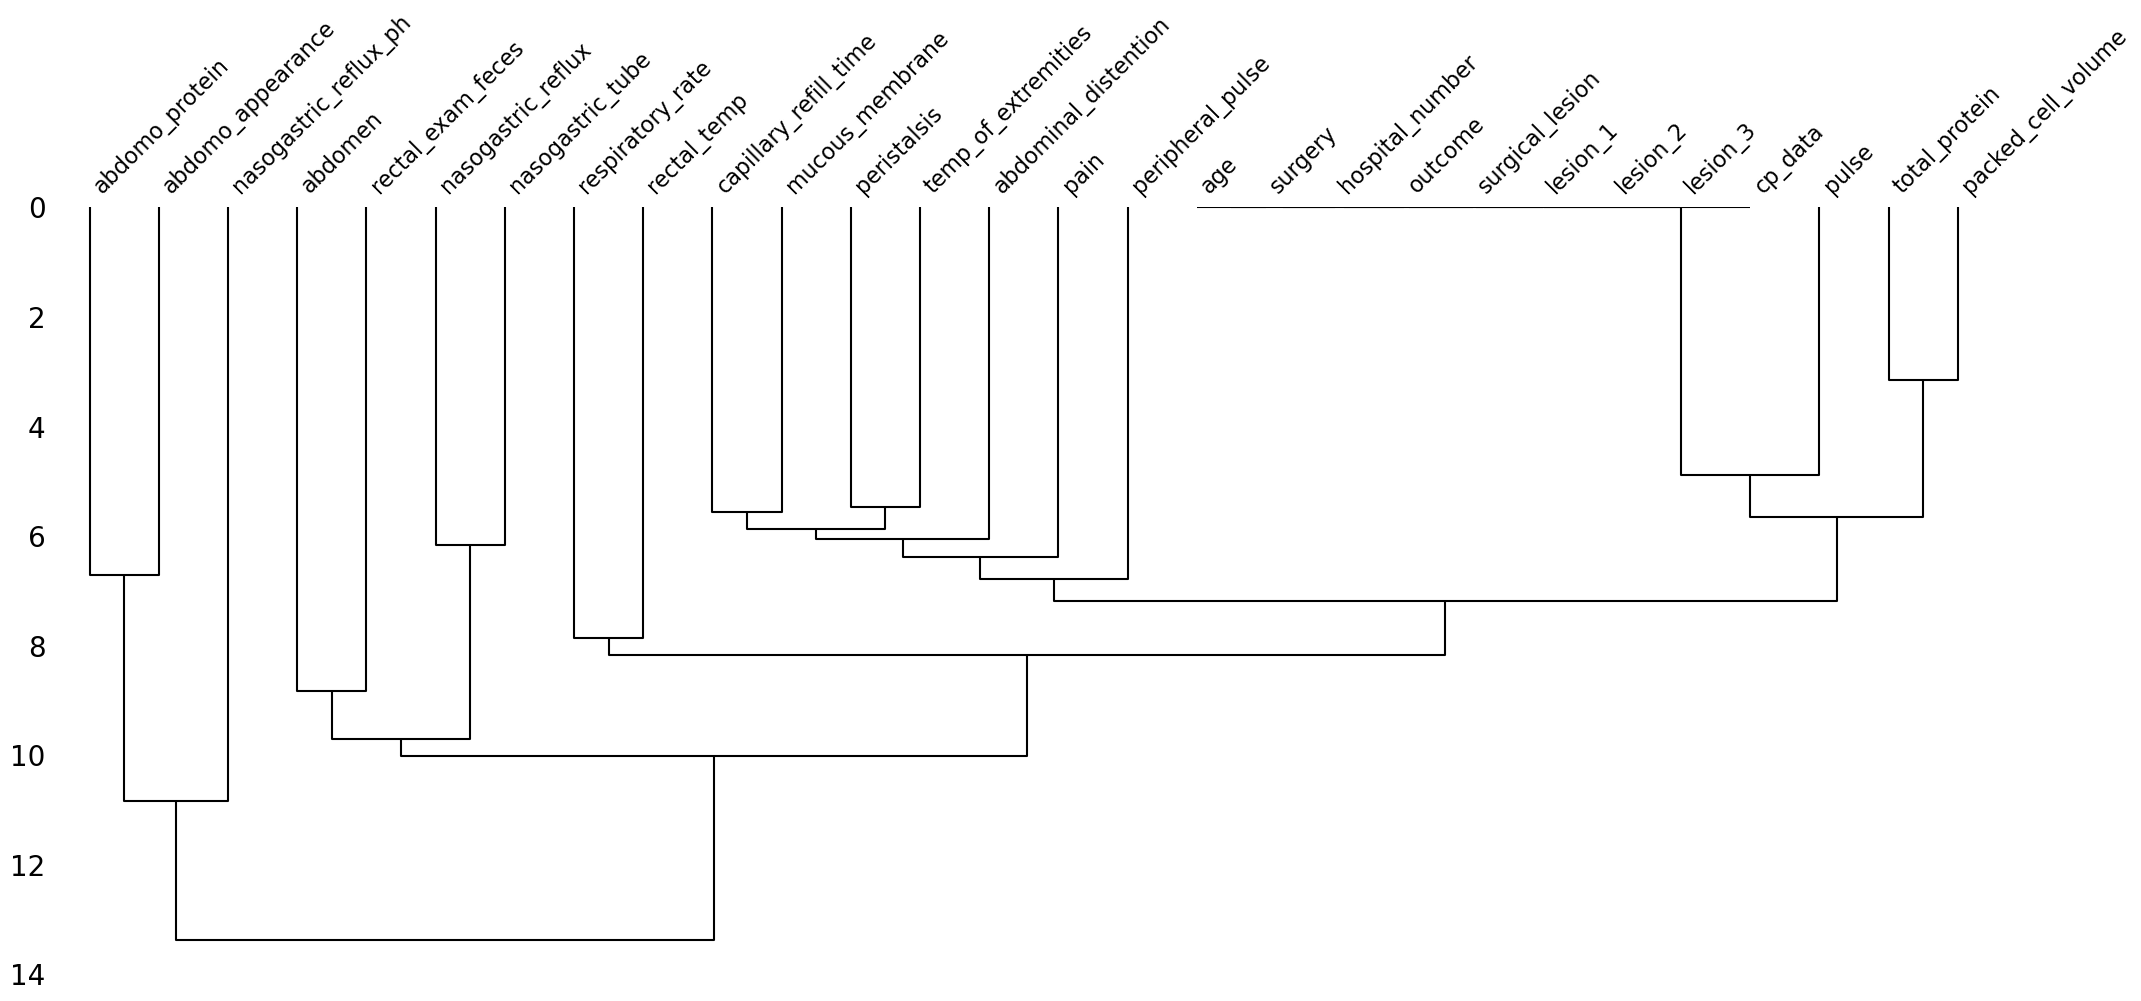

In [8]:
# Analyser la corrélation entre les valeurs manquantes
msno.dendrogram(df)
plt.show()

# Imputation par la médiane, la moyenne et le mode

L'imputation par la moyenne, la médiane et le mode sont des méthodes simples pour remplacer les valeurs manquantes dans une variable.

L'imputation par la moyenne consiste à remplacer les valeurs manquantes par la moyenne des valeurs non manquantes dans la variable. Cette méthode est utile pour les variables continues et symétriques.

L'imputation par la médiane consiste à remplacer les valeurs manquantes par la médiane des valeurs non manquantes dans la variable. Cette méthode est utile pour les variables continues qui ont une distribution asymétrique ou pour les variables ordinales.

L'imputation par le mode consiste à remplacer les valeurs manquantes par le mode, c'est-à-dire la valeur la plus fréquente, dans la variable. Cette méthode est utile pour les variables catégorielles ou nominales.

Ces méthodes sont simples à mettre en œuvre et peuvent être efficaces lorsque les données manquantes sont MCAR (Missing Completely At Random), c'est-à-dire que les valeurs manquantes sont indépendantes des autres variables. Toutefois, elles peuvent introduire un biais dans les données si les valeurs manquantes sont liées à d'autres variables dans les données.

## Imputation par la médiane

In [9]:
imputer_median = SimpleImputer(strategy='median')
df['total_protein_impute'] = imputer_median.fit_transform(df[['total_protein']])

df.isnull().mean()

surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
nasogastric_tube         0.347826
nasogastric_reflux       0.354515
nasogastric_reflux_ph    0.822742
rectal_exam_feces        0.341137
abdomen                  0.394649
packed_cell_volume       0.096990
total_protein            0.110368
abdomo_appearance        0.551839
abdomo_protein           0.662207
outcome                  0.000000
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
total_protein_impute     0.000000
dtype: float64

In [10]:
# Autre méthode

# Imputation par la médiane pour la colonne 'total_protein'
median = df['packed_cell_volume'].median()
df['packed_cell_volume_impute']=df['packed_cell_volume'].fillna(median)

# Vérifier les valeurs manquantes après imputation
missing_values_after = df.isnull().mean()
print("\nMissing Values After Treatment:\n", missing_values_after)


Missing Values After Treatment:
 surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2        

## Imputation par la moyenne

In [11]:
imputer_mean = SimpleImputer(strategy='mean')
df['pulse_imp'] = imputer_mean.fit_transform(df[['pulse']])

df.isnull().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3    

In [12]:
# Autre méthode

# Imputation par la moyenne pour la colonne 'total_protein'
mean = df['total_protein'].mean()
df['total_protein_imp']=df['total_protein'].fillna(mean)

# Vérifier les valeurs manquantes après imputation
missing_values_after = df.isnull().mean()
print("\nMissing Values After Treatment:\n", missing_values_after)


Missing Values After Treatment:
 surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2        

## Imputation par le mode

In [13]:
# Imputation par le mode
imputer_mode = SimpleImputer(strategy='most_frequent')
df['peripheral_pulse_imputed'] = imputer_mode.fit_transform(df[['peripheral_pulse']])


In [14]:
# Vérifier les valeurs manquantes après traitement
missing_values = df.isnull().sum()
print("\nMissing Values After Treatment:\n", missing_values)


Missing Values After Treatment:
 surgery                        0
age                            0
hospital_number                0
rectal_temp                   60
pulse                         24
respiratory_rate              58
temp_of_extremities           56
peripheral_pulse              69
mucous_membrane               47
capillary_refill_time         32
pain                          55
peristalsis                   44
abdominal_distention          56
nasogastric_tube             104
nasogastric_reflux           106
nasogastric_reflux_ph        246
rectal_exam_feces            102
abdomen                      118
packed_cell_volume            29
total_protein                 33
abdomo_appearance            165
abdomo_protein               198
outcome                        0
surgical_lesion                0
lesion_1                       0
lesion_2                       0
lesion_3                       0
cp_data                        0
total_protein_impute           0
packed_ce

In [15]:
# Autre approche

# imputation par le mode
mode = df.surgery.mode()
df['surgery_imputed'] = df['surgery'].fillna(mode)
df.isnull().mean()


surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3    

# KNN imputer

L'algorithme KNNImputer de scikit-learn est une méthode d'imputation des valeurs manquantes basée sur les k plus proches voisins. Il s'agit d'une approche non-paramétrique qui utilise les valeurs des k plus proches voisins pour imputer les valeurs manquantes.

L'algorithme fonctionne en plusieurs étapes :

1. Définir la valeur de k, qui représente le nombre de voisins les plus proches à considérer pour l'imputation.

2. Pour chaque valeur manquante, trouver les k plus proches voisins parmi les autres observations qui ont des valeurs non manquantes pour la variable en question. La distance entre les observations peut être mesurée de différentes manières, telles que la distance euclidienne ou la distance de Manhattan.

3. Imputer la valeur manquante par la valeur moyenne ou médiane des k voisins les plus proches.

L'algorithme KNNImputer est utile lorsque les données manquantes sont MCAR (Missing Completely At Random) ou MAR (Missing At Random), c'est-à-dire que les valeurs manquantes ne sont pas liées à la valeur de la variable elle-même. Il peut être utilisé pour imputer des variables continues ou catégorielles. Toutefois, il peut être plus lent que d'autres méthodes d'imputation telles que la simple imputation ou l'imputation par la régression.

In [16]:
# Imputation par KNN Imputer
# KNN imputer avec 3 voisins pour plusieurs colonnes
imputer = KNNImputer(n_neighbors=3)

df[['total_protein_impute_knn', 'rectal_temp_impute_knn', 'pulse_impute_knn']] = imputer.fit_transform(df[['total_protein', 'rectal_temp', 'pulse']])

df.isnull().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3    

# IterativeImputer

L'algorithme IterativeImputer de scikit-learn est une méthode d'imputation des valeurs manquantes basée sur la régression. Il s'agit d'une approche itérative qui utilise un modèle de régression pour imputer les valeurs manquantes à chaque itération, en utilisant les autres variables pour prédire la variable manquante.

L'algorithme fonctionne en plusieurs étapes :

1. Imputer les valeurs manquantes initiales par une stratégie simple comme la moyenne, la médiane ou le mode.

2. Ensuite, le modèle de régression est ajusté pour prédire les valeurs manquantes à partir des autres variables. Cette régression peut être linéaire, non linéaire ou de tout autre type en fonction des données.

3. Les valeurs manquantes sont alors imputées à l'aide du modèle de régression.

4. Les étapes 2 et 3 sont répétées plusieurs fois jusqu'à ce que la convergence soit atteinte. La convergence est déterminée par un critère d'arrêt défini, tel que le nombre maximal d'itérations ou la convergence de la moyenne des différences entre les imputations consécutives.

L'algorithme IterativeImputer est utile lorsque les données manquantes sont MNAR (Missing Not At Random), c'est-à-dire que les valeurs manquantes sont liées à la valeur de la variable elle-même. Il peut être utilisé pour imputer des variables continues ou catégorielles. Toutefois, il peut être plus lent que d'autres méthodes d'imputation telles que la simple imputation.

In [17]:
# Créer un imputer IterativeImputer avec une stratégie de 'mean'
imputer = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)

# Imputer les colonnes 'total_protein', 'rectal_temp' et 'pulse' de la DataFrame df
df_imputed = pd.DataFrame(imputer.fit_transform(df[['total_protein', 'rectal_temp', 'pulse']]), columns=['total_protein_imputed', 'rectal_temp_imputed', 'pulse_imputed'])

# Concaténer la DataFrame imputée avec la DataFrame originale
df = pd.concat([df, df_imputed], axis=1)
df.isnull().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
nasogastric_tube             0.347826
nasogastric_reflux           0.354515
nasogastric_reflux_ph        0.822742
rectal_exam_feces            0.341137
abdomen                      0.394649
packed_cell_volume           0.096990
total_protein                0.110368
abdomo_appearance            0.551839
abdomo_protein               0.662207
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3    